In [688]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import datetime as dt
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)

# Broadband speeds file reading

In [689]:
df_i = pd.read_csv("internet_speeds.csv")
df_i.head()

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
0,Monaco,1.0,192.68,NaN,NaN,January 2022
1,Singapore,2.0,192.01,19.0,64.92,January 2022
2,Chile,3.0,189.36,109.0,15.50,January 2022
3,Thailand,4.0,184.03,56.0,32.38,January 2022
4,Hong Kong (SAR),5.0,173.42,38.0,45.86,January 2022


In [690]:
df_i.dtypes

Country                  object
Broadband Speed Rank    float64
Broadband Mbps          float64
Mobile Speed Rank       float64
Mobile Mbps             float64
As of                    object
dtype: object

all of the necessary columns were already float types for this data

In [691]:
print(df_i.isnull().sum())

Country                  0
Broadband Speed Rank     0
Broadband Mbps           0
Mobile Speed Rank       40
Mobile Mbps             40
As of                    0
dtype: int64


In [692]:
df_i.shape

(179, 6)

In [693]:
df_i = df_i.dropna()

In [694]:
print(df_i.isnull().sum())

Country                 0
Broadband Speed Rank    0
Broadband Mbps          0
Mobile Speed Rank       0
Mobile Mbps             0
As of                   0
dtype: int64


# Happiness CSV per country

In [695]:
df_happy = pd.read_csv("happiness.csv")
df_happy.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419


In [696]:
df_happy.dtypes

RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
Dystopia (1.83) + residual                    float64
Explained by: GDP per capita                  float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
dtype: object

these columns also had the necessary data types the data types did not need to be cleaned

In [697]:
print(df_happy.isnull().sum())

RANK                                          0
Country                                       0
Happiness score                               1
Whisker-high                                  1
Whisker-low                                   1
Dystopia (1.83) + residual                    1
Explained by: GDP per capita                  1
Explained by: Social support                  1
Explained by: Healthy life expectancy         1
Explained by: Freedom to make life choices    1
Explained by: Generosity                      1
Explained by: Perceptions of corruption       1
dtype: int64


In [698]:
df_happy = df_happy.dropna()

In [699]:
print(df_happy.isnull().sum())

RANK                                          0
Country                                       0
Happiness score                               0
Whisker-high                                  0
Whisker-low                                   0
Dystopia (1.83) + residual                    0
Explained by: GDP per capita                  0
Explained by: Social support                  0
Explained by: Healthy life expectancy         0
Explained by: Freedom to make life choices    0
Explained by: Generosity                      0
Explained by: Perceptions of corruption       0
dtype: int64


In [700]:
print(df_happy.shape)
df_happy

(146, 12)


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana*,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda*,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


## match the data by country

In [701]:
print(df_happy.shape)
print(df_i.shape)

print(df_happy.dtypes)

df_i.dtypes

(146, 12)
(139, 6)
RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
Dystopia (1.83) + residual                    float64
Explained by: GDP per capita                  float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
dtype: object


Country                  object
Broadband Speed Rank    float64
Broadband Mbps          float64
Mobile Speed Rank       float64
Mobile Mbps             float64
As of                    object
dtype: object

remove the '*' from the happiness data to make it easier to match

In [702]:
#drop rows where the country is not present in df_i
#find the difference in the arrays
#is in


#remove * from h


test_h = df_happy[:]

test_i = df_i[:]

hcountries = test_h.Country.tolist()
icountries = test_i.Country.tolist()

fhcountries = []
for c in hcountries:
    if (c[len(c)-1] == "*"):
        c= c[:-1]
        fhcountries.append(c)
    else:
        fhcountries.append(c)
hcountries = fhcountries[:]

#mutually exclusive countries

mecountries = set(hcountries).symmetric_difference(icountries)
len(mecountries)
hcountries

['Finland',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Netherlands',
 'Luxembourg',
 'Sweden',
 'Norway',
 'Israel',
 'New Zealand',
 'Austria',
 'Australia',
 'Ireland',
 'Germany',
 'Canada',
 'United States',
 'United Kingdom',
 'Czechia',
 'Belgium',
 'France',
 'Bahrain',
 'Slovenia',
 'Costa Rica',
 'United Arab Emirates',
 'Saudi Arabia',
 'Taiwan Province of China',
 'Singapore',
 'Romania',
 'Spain',
 'Uruguay',
 'Italy',
 'Kosovo',
 'Malta',
 'Lithuania',
 'Slovakia',
 'Estonia',
 'Panama',
 'Brazil',
 'Guatemala',
 'Kazakhstan',
 'Cyprus',
 'Latvia',
 'Serbia',
 'Chile',
 'Nicaragua',
 'Mexico',
 'Croatia',
 'Poland',
 'El Salvador',
 'Kuwait',
 'Hungary',
 'Mauritius',
 'Uzbekistan',
 'Japan',
 'Honduras',
 'Portugal',
 'Argentina',
 'Greece',
 'South Korea',
 'Philippines',
 'Thailand',
 'Moldova',
 'Jamaica',
 'Kyrgyzstan',
 'Belarus',
 'Colombia',
 'Bosnia and Herzegovina',
 'Mongolia',
 'Dominican Republic',
 'Malaysia',
 'Bolivia',
 'China',
 'Paraguay',
 'Peru',
 'Mont

reset the happiness countries to the fixed countries

In [703]:
test_h['Country'] = hcountries[:]

In [704]:
#function to remove mutually exclusive countries from both
def removeME(countries, ctbr):
    for c in ctbr:
        countries = list(filter(lambda co: co != c, countries))
    return countries

In [705]:
test_h

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,7.821,7.886,7.756,2.518,1.892,1.258,0.775,0.736,0.109,0.534
1,2,Denmark,7.636,7.710,7.563,2.226,1.953,1.243,0.777,0.719,0.188,0.532
2,3,Iceland,7.557,7.651,7.464,2.320,1.936,1.320,0.803,0.718,0.270,0.191
3,4,Switzerland,7.512,7.586,7.437,2.153,2.026,1.226,0.822,0.677,0.147,0.461
4,5,Netherlands,7.415,7.471,7.359,2.137,1.945,1.206,0.787,0.651,0.271,0.419
...,...,...,...,...,...,...,...,...,...,...,...,...
141,142,Botswana,3.471,3.667,3.275,0.187,1.503,0.815,0.280,0.571,0.012,0.102
142,143,Rwanda,3.268,3.462,3.074,0.536,0.785,0.133,0.462,0.621,0.187,0.544
143,144,Zimbabwe,2.995,3.110,2.880,0.548,0.947,0.690,0.270,0.329,0.106,0.105
144,145,Lebanon,2.955,3.049,2.862,0.216,1.392,0.498,0.631,0.103,0.082,0.034


In [706]:
mehcountries = removeME(hcountries, mecountries)


In [707]:
meicountries = removeME(icountries, mecountries)

In [708]:
#countries that we want to put in the  list
meicountries.sort() == mehcountries.sort()

True

We have found the countries that are present in both and fixed the * at the end of some

In [709]:
fhcountries

['Finland',
 'Denmark',
 'Iceland',
 'Switzerland',
 'Netherlands',
 'Luxembourg',
 'Sweden',
 'Norway',
 'Israel',
 'New Zealand',
 'Austria',
 'Australia',
 'Ireland',
 'Germany',
 'Canada',
 'United States',
 'United Kingdom',
 'Czechia',
 'Belgium',
 'France',
 'Bahrain',
 'Slovenia',
 'Costa Rica',
 'United Arab Emirates',
 'Saudi Arabia',
 'Taiwan Province of China',
 'Singapore',
 'Romania',
 'Spain',
 'Uruguay',
 'Italy',
 'Kosovo',
 'Malta',
 'Lithuania',
 'Slovakia',
 'Estonia',
 'Panama',
 'Brazil',
 'Guatemala',
 'Kazakhstan',
 'Cyprus',
 'Latvia',
 'Serbia',
 'Chile',
 'Nicaragua',
 'Mexico',
 'Croatia',
 'Poland',
 'El Salvador',
 'Kuwait',
 'Hungary',
 'Mauritius',
 'Uzbekistan',
 'Japan',
 'Honduras',
 'Portugal',
 'Argentina',
 'Greece',
 'South Korea',
 'Philippines',
 'Thailand',
 'Moldova',
 'Jamaica',
 'Kyrgyzstan',
 'Belarus',
 'Colombia',
 'Bosnia and Herzegovina',
 'Mongolia',
 'Dominican Republic',
 'Malaysia',
 'Bolivia',
 'China',
 'Paraguay',
 'Peru',
 'Mont

In [710]:
test_i

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
1,Singapore,2.0,192.01,19.0,64.92,January 2022
2,Chile,3.0,189.36,109.0,15.50,January 2022
3,Thailand,4.0,184.03,56.0,32.38,January 2022
4,Hong Kong (SAR),5.0,173.42,38.0,45.86,January 2022
5,Denmark,6.0,163.60,8.0,87.11,January 2022
...,...,...,...,...,...,...
174,Yemen,175.0,2.74,140.0,0.53,January 2022
175,Ethiopia,176.0,2.69,78.0,22.83,January 2022
176,Cuba,177.0,1.90,119.0,12.71,January 2022
177,Turkmenistan,178.0,1.89,139.0,3.09,January 2022


## Remove the unwanted countries from the happiness frame

In [711]:

#where a testh2[Country] isnt in mehcountries
#drop the row
df_testh = []
dfTesth2 = test_h

# Iterate over the countries in mehcountries
for mehcs in mehcountries:
    
    df_testh.append(dfTesth2[dfTesth2['Country'] == mehcs])
 
df_testh = pd.concat(df_testh)
 
df_testh


,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
145,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
89,90,Albania,5.199,5.321,5.076,1.718,1.439,0.646,0.719,0.511,0.138,0.028
95,96,Algeria,5.122,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150
56,57,Argentina,5.967,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085
81,82,Armenia,5.399,5.519,5.278,1.654,1.434,0.820,0.668,0.558,0.054,0.210
...,...,...,...,...,...,...,...,...,...,...,...,...
107,108,Venezuela,4.925,5.051,4.800,2.790,0.000,0.968,0.578,0.283,0.225,0.082
76,77,Vietnam,5.485,5.570,5.400,1.735,1.252,0.932,0.611,0.707,0.143,0.105
131,132,Yemen,4.197,4.384,4.010,1.561,0.691,1.043,0.384,0.330,0.090,0.098
136,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083


In [712]:
test_i

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
1,Singapore,2.0,192.01,19.0,64.92,January 2022
2,Chile,3.0,189.36,109.0,15.50,January 2022
3,Thailand,4.0,184.03,56.0,32.38,January 2022
4,Hong Kong (SAR),5.0,173.42,38.0,45.86,January 2022
5,Denmark,6.0,163.60,8.0,87.11,January 2022
...,...,...,...,...,...,...
174,Yemen,175.0,2.74,140.0,0.53,January 2022
175,Ethiopia,176.0,2.69,78.0,22.83,January 2022
176,Cuba,177.0,1.90,119.0,12.71,January 2022
177,Turkmenistan,178.0,1.89,139.0,3.09,January 2022


## Remove the unwanted countries from the broadband frame

In [713]:

df_testi = []
dfTesth3 = test_i
for mehcs in mehcountries:
    df_testi.append(dfTesth3[dfTesth3['Country'] == mehcs])
 
df_testi = pd.concat(df_testi)
 
df_testi


,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
178,Afghanistan,179.0,1.62,138.0,5.10,January 2022
90,Albania,91.0,33.50,48.0,35.62,January 2022
143,Algeria,144.0,9.72,125.0,11.31,January 2022
81,Argentina,82.0,38.47,84.0,20.07,January 2022
87,Armenia,88.0,34.26,69.0,26.23,January 2022
...,...,...,...,...,...,...
160,Venezuela,161.0,7.15,136.0,5.99,January 2022
46,Vietnam,47.0,67.50,45.0,39.01,January 2022
174,Yemen,175.0,2.74,140.0,0.53,January 2022
169,Zambia,170.0,4.60,121.0,12.46,January 2022


## Reset the indexes for both

In [714]:
df_testi.reset_index(drop=True, inplace=True)

In [715]:
df_testh.reset_index(drop=True, inplace=True)

In [716]:
df_testi['Country'].sort_values() == df_testh['Country'].sort_values()

0      True
1      True
2      True
3      True
4      True
       ... 
116    True
117    True
118    True
119    True
120    True
Name: Country, Length: 121, dtype: bool

In [717]:
df_testi.dtypes

Country                  object
Broadband Speed Rank    float64
Broadband Mbps          float64
Mobile Speed Rank       float64
Mobile Mbps             float64
As of                    object
dtype: object

In [718]:
df_testh.dtypes

RANK                                            int64
Country                                        object
Happiness score                               float64
Whisker-high                                  float64
Whisker-low                                   float64
Dystopia (1.83) + residual                    float64
Explained by: GDP per capita                  float64
Explained by: Social support                  float64
Explained by: Healthy life expectancy         float64
Explained by: Freedom to make life choices    float64
Explained by: Generosity                      float64
Explained by: Perceptions of corruption       float64
dtype: object

In [719]:
df_testh

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
1,90,Albania,5.199,5.321,5.076,1.718,1.439,0.646,0.719,0.511,0.138,0.028
2,96,Algeria,5.122,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150
3,57,Argentina,5.967,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085
4,82,Armenia,5.399,5.519,5.278,1.654,1.434,0.820,0.668,0.558,0.054,0.210
...,...,...,...,...,...,...,...,...,...,...,...,...
116,108,Venezuela,4.925,5.051,4.800,2.790,0.000,0.968,0.578,0.283,0.225,0.082
117,77,Vietnam,5.485,5.570,5.400,1.735,1.252,0.932,0.611,0.707,0.143,0.105
118,132,Yemen,4.197,4.384,4.010,1.561,0.691,1.043,0.384,0.330,0.090,0.098
119,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083


# EDA - internet speeds

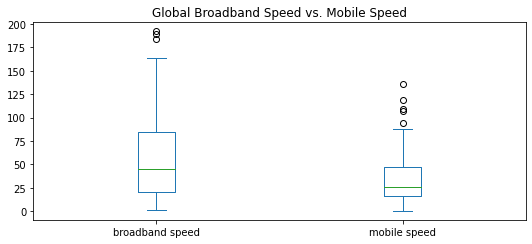

In [720]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
df_bp = pd.DataFrame({"broadband speed": df_testi['Broadband Mbps'], "mobile speed":df_testi['Mobile Mbps'] })
df_bp[['broadband speed', "mobile speed"]].plot(kind='box', title='Global Broadband Speed vs. Mobile Speed')

plt.show()

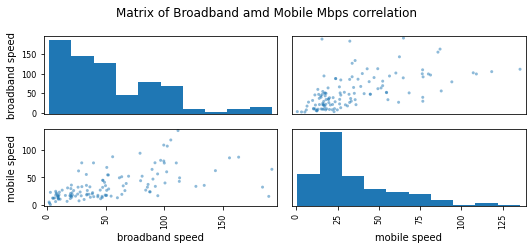

In [721]:
pd.plotting.scatter_matrix(df_bp, )
plt.suptitle("Matrix of Broadband amd Mobile Mbps correlation")
plt.show()

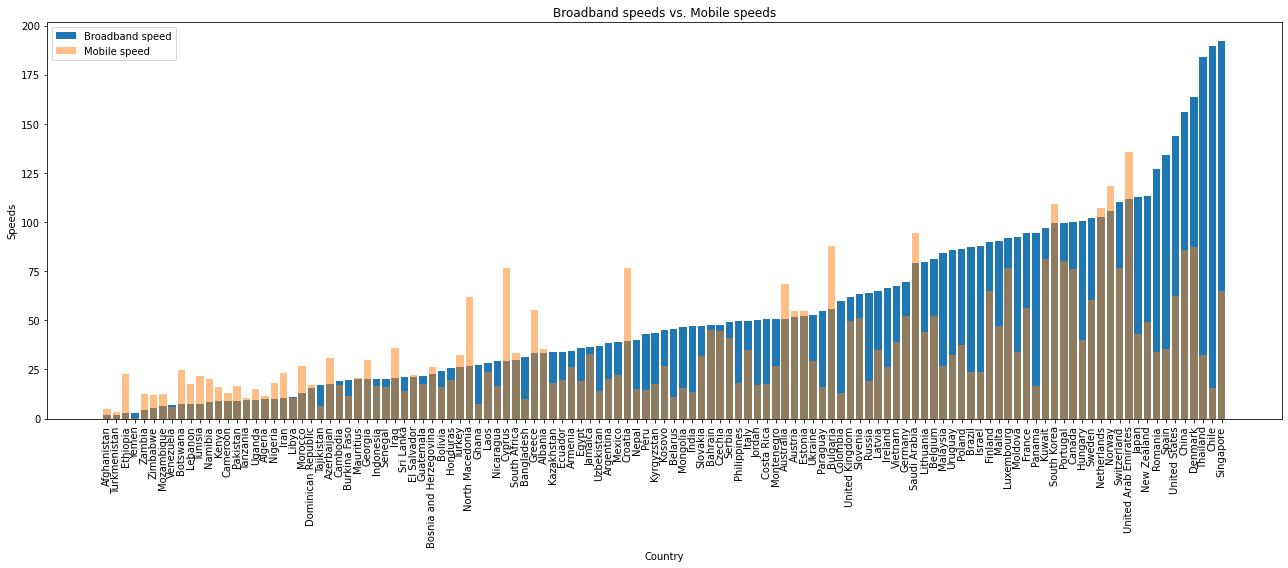

In [722]:
#plot mobile and broadband rank on one graph 
Xy = df_testi.sort_values(by='Broadband Mbps')

xCountries = Xy['Country']
yBBRank = Xy['Broadband Mbps']
yMRank = Xy['Mobile Mbps']

fig = plt.figure(figsize = (18, 8))

plt.bar(xCountries, yBBRank, label='Broadband speed')
plt.bar(xCountries, yMRank, alpha=.5, label='Mobile speed' )
plt.xticks(rotation=90)
plt.xlabel("Country")
plt.ylabel("Speeds")
plt.title("Broadband speeds vs. Mobile speeds")
plt.legend()
plt.show()

# EDA - Happiness index

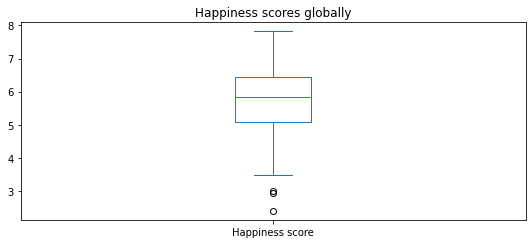

In [723]:
df_testh[['Happiness score']].plot(kind='box', title='Happiness scores globally')
plt.show()

In [724]:
df_testh.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
1,90,Albania,5.199,5.321,5.076,1.718,1.439,0.646,0.719,0.511,0.138,0.028
2,96,Algeria,5.122,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150
3,57,Argentina,5.967,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085
4,82,Armenia,5.399,5.519,5.278,1.654,1.434,0.820,0.668,0.558,0.054,0.210


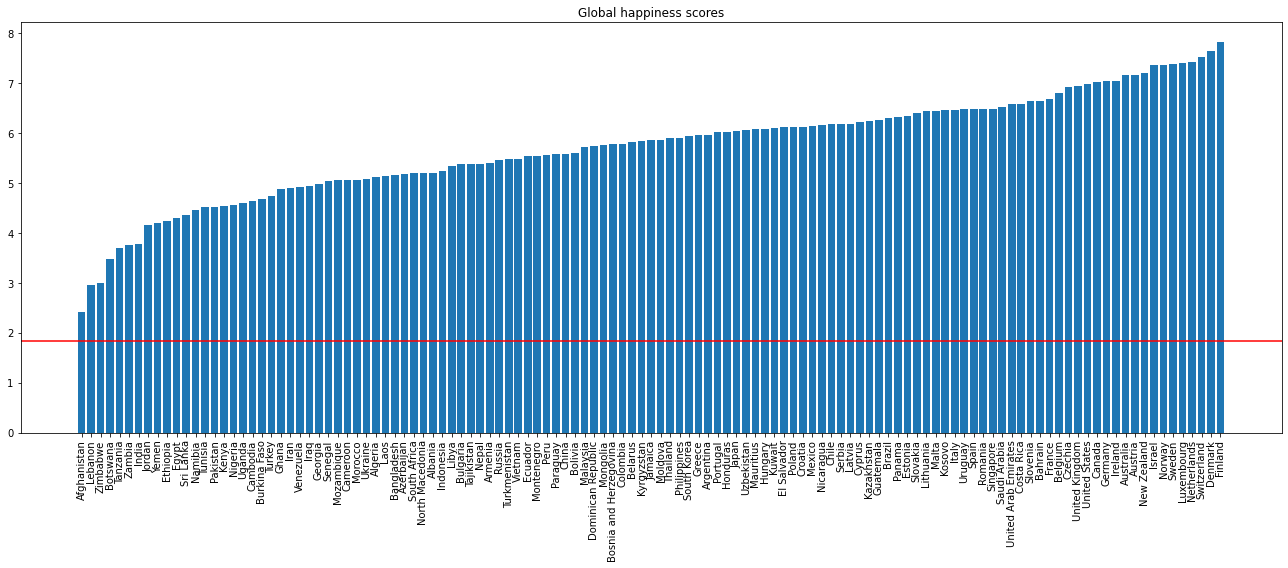

In [725]:

xy = df_testh.sort_values(by='Happiness score')

fig = plt.figure(figsize = (18, 8))
plt.title("Global happiness scores")
plt.axhline(y=1.83, color='r', linestyle='-')
plt.bar(xy['Country'],xy['Happiness score'])
plt.xticks(rotation=90)
plt.show()

In [726]:
df_testh['Happiness score'].mean()

5.7228925619834685

## stacked chart for the explained by columns

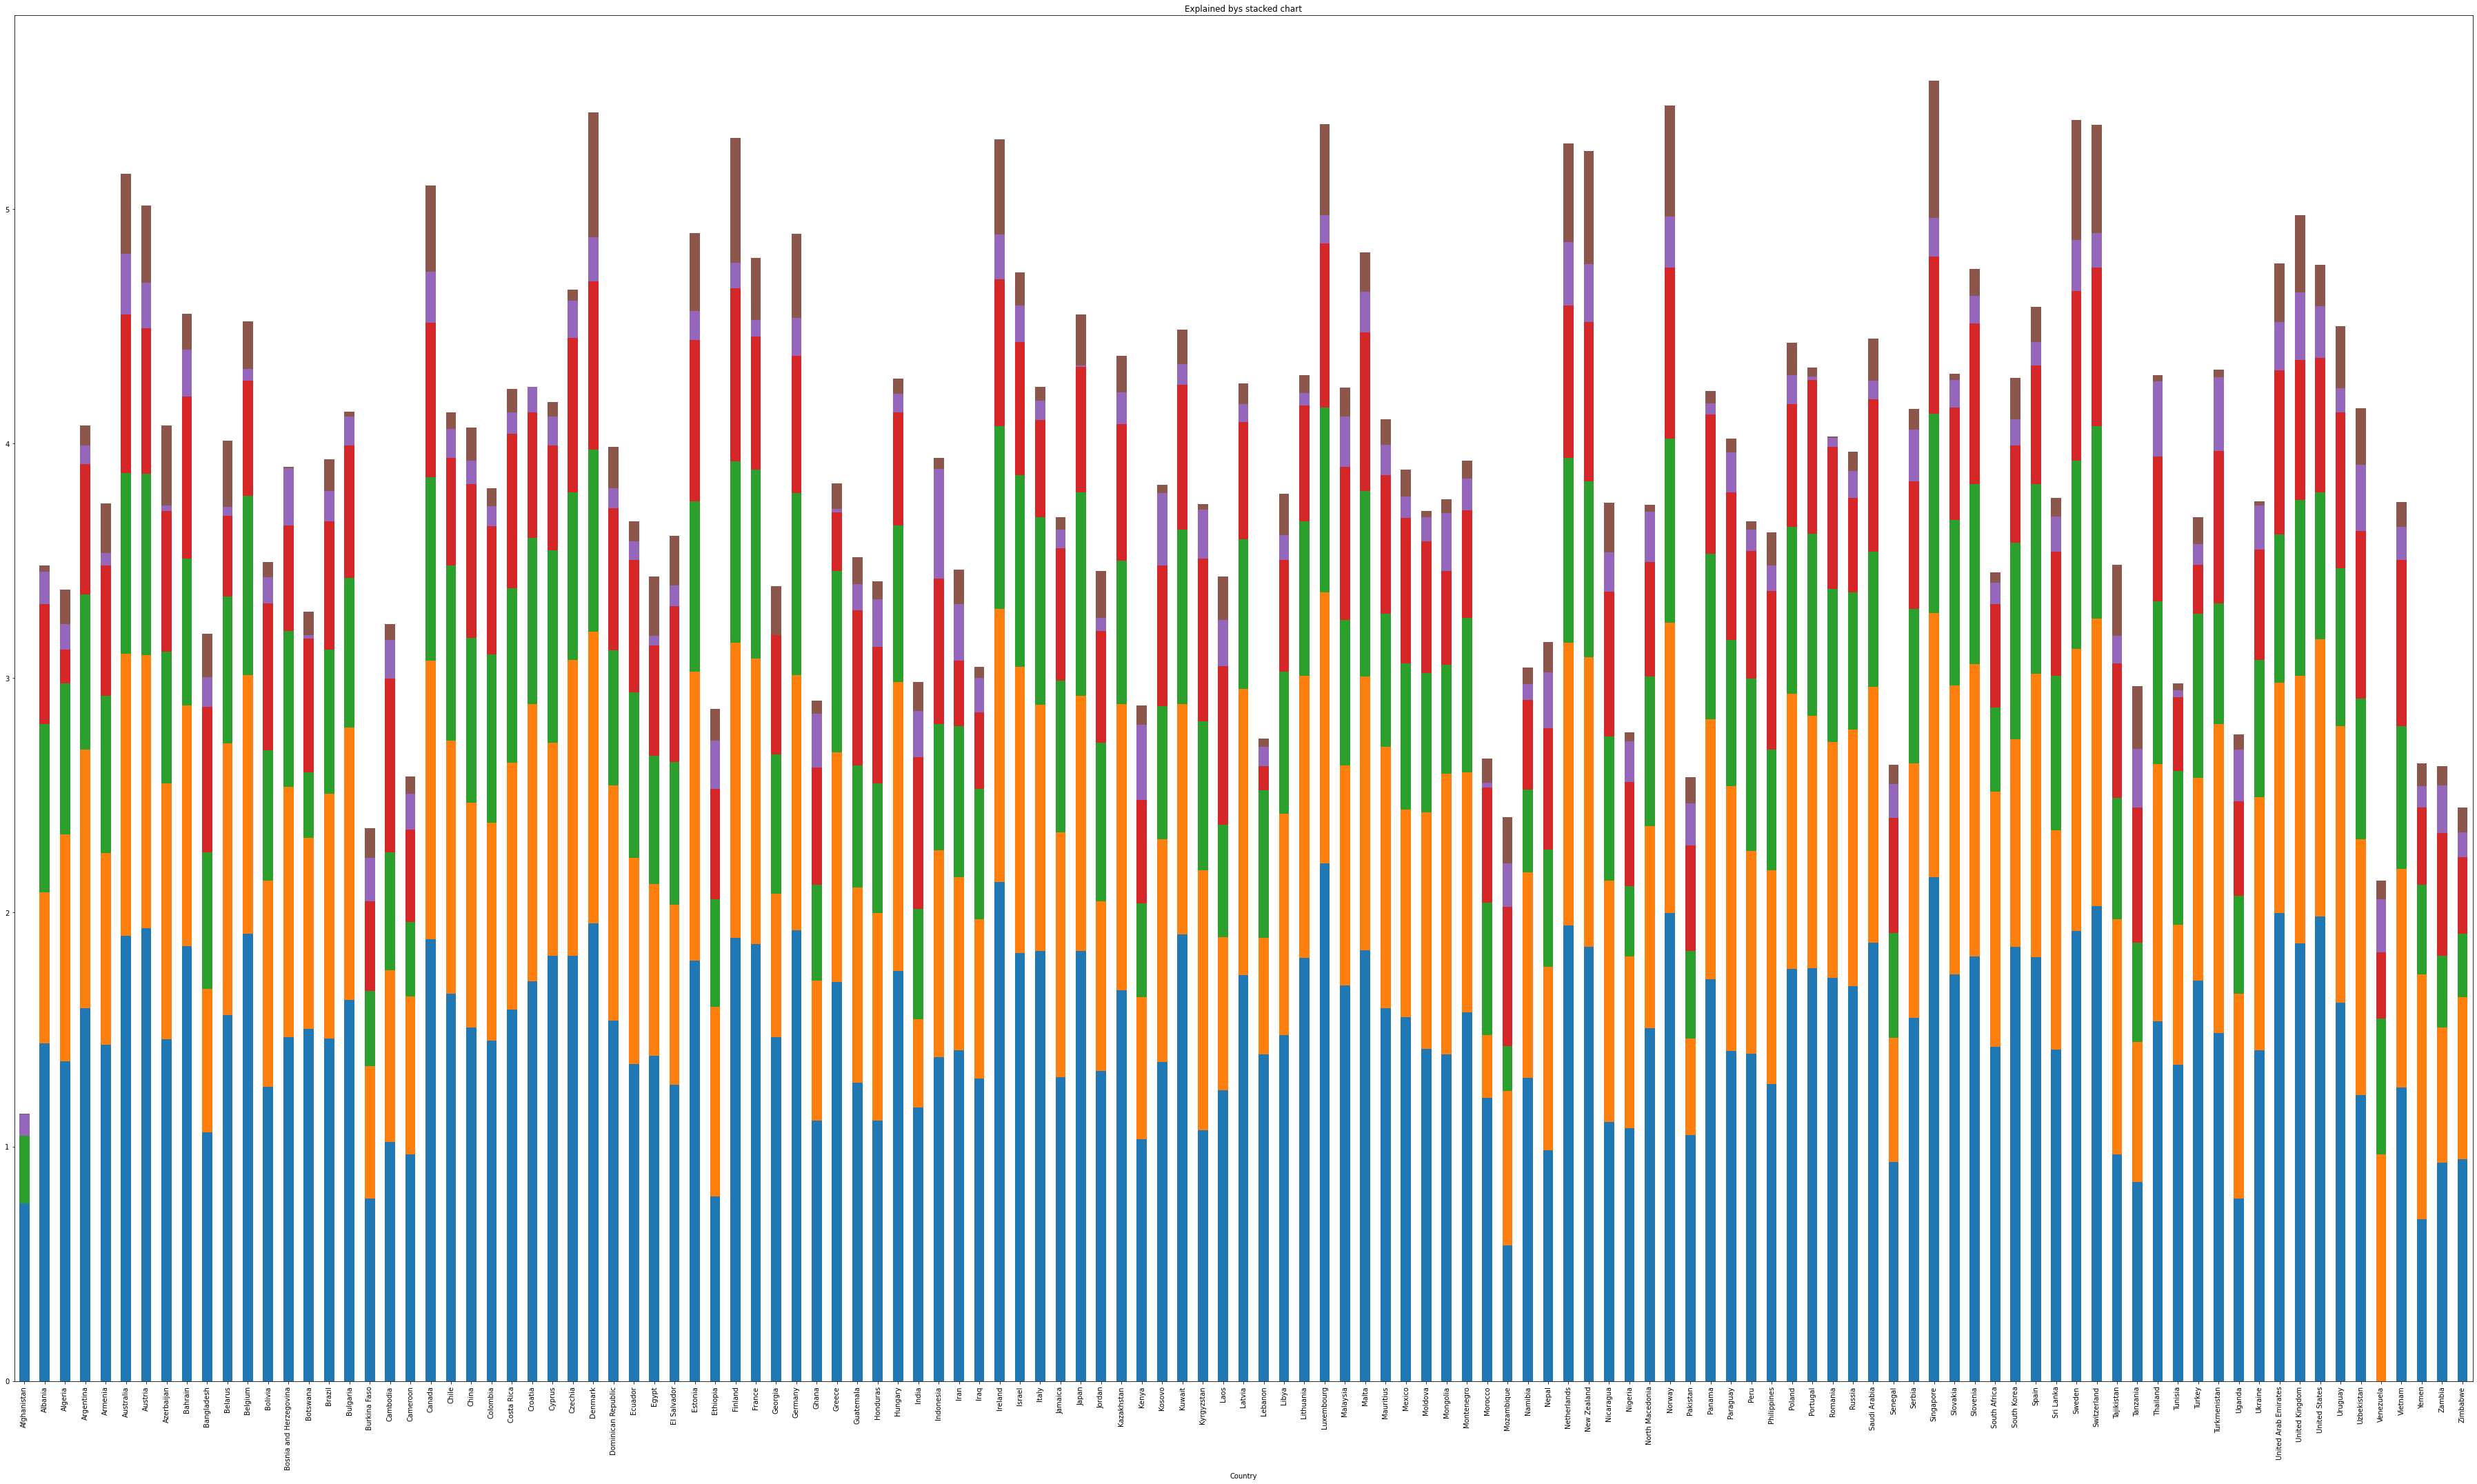

In [727]:
#stacked df.plot for explaind bys
df_explainedby = pd.DataFrame(df_testh.filter(like='Explained by:'))
df_explainedby['Country'] = df_testh['Country']
df_explainedby.plot(x='Country', kind='bar', stacked=True,
        title='Explained bys stacked chart', figsize=[50, 30], legend=False)

plt.show()
#gdp
#socialo support
#life expectancy
#freedom to make choices
#generoisty
#corruption


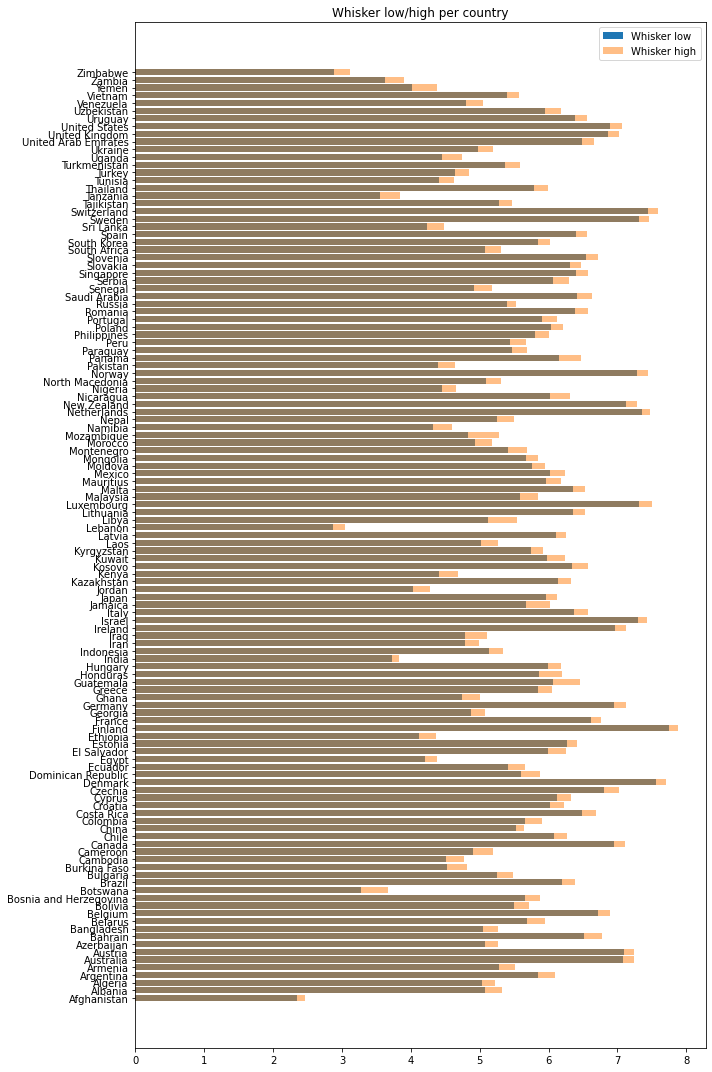

In [728]:


xcountries = df_testh['Country']

ylow = df_testh['Whisker-low']
yhigh = df_testh['Whisker-high']

fig = plt.figure(figsize = (10, 15))
plt.title("Whisker low/high per country")
plt.barh(xcountries, ylow, label='Whisker low')
plt.barh(xcountries, yhigh, label='Whisker high',alpha=.5)
plt.legend()
plt.show()

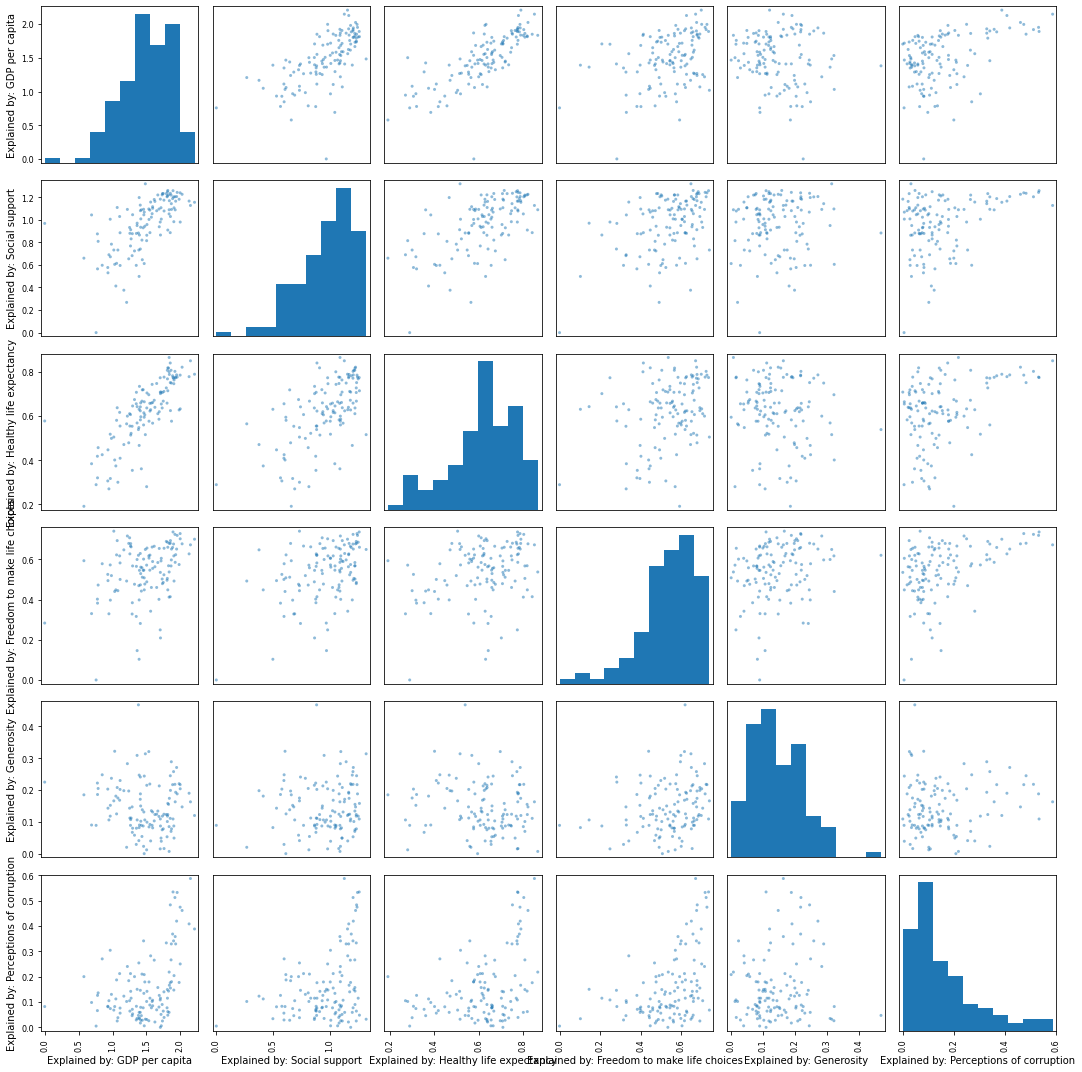

In [729]:
pd.plotting.scatter_matrix(df_explainedby, figsize=[15,15])
plt.show()

# confidence interval for all happiness scores


In [730]:
df_testh['Happiness score'].mean()

5.7228925619834685

the given whisker-low/high intervals

In [731]:

print(df_testh['Whisker-low'].mean(), df_testh['Whisker-high'].mean())

5.614198347107438 5.831603305785124


calculating confidence levels with a 95% significance

In [732]:
ci = st.norm.interval(alpha=.95, loc=df_testh['Happiness score'].mean(), scale=st.sem(df_testh['Happiness score']))
ci

(5.537033360851201, 5.9087517631157365)

## z-test for the difference in whisker score and the confidence intervals

h0 : xbar = u0
h1 : xbar \= u0

Reject h0 if p < 0.05

In [733]:

sdseries = pd.concat([df_testh['Whisker-low'], df_testh['Whisker-high']], axis=0)
sdseries

0      2.339
1      5.076
2      5.030
3      5.844
4      5.278
       ...  
116    5.051
117    5.570
118    4.384
119    3.902
120    3.110
Length: 242, dtype: float64

### z-test function

In [734]:
def z_test(xbar, sigma, mu, n, tail=2):
    zobs = (xbar - mu)/(sigma/np.sqrt(n))
    pvalue = tail*st.norm.sf(np.abs(zobs))
    return zobs, pvalue

In [735]:
xbar = np.mean(ci)
mu0 = np.mean([df_testh['Whisker-low'].mean(), df_testh['Whisker-high'].mean()])
sigma = np.std(sdseries)
n=len(df_testh['Whisker-low'])
zobs, p = z_test(xbar, sigma, mu0, n)
p

0.9999305794706278

In [736]:
p < 0.05

False

not enough evidence to reject h0

## t test for explained by columns corruption and generosity

Levene test to check equal variance

In [737]:
st.levene(df_testh['Explained by: Generosity'], df_testh['Explained by: Perceptions of corruption'])

LeveneResult(statistic=9.354369335060333, pvalue=0.0024768255543945452)

low p-value suggests unequal variance

two tailed t test with independent samples and unequal variance 

h0 : u1 = u0

h1 : u1 \= u0

Reject h0 if t observed is greater than the critical t value at a 95% significance level

In [738]:
tstat, p = st.ttest_ind(df_testh['Explained by: Generosity'], df_testh['Explained by: Perceptions of corruption'], equal_var=False, alternative='two-sided')

In [739]:
tcrit = st.t.ppf(.975, df=120)

In [740]:
tcrit

1.9799304050527766

In [741]:
tstat > tcrit

False

Not enough evidence to reject h0

# t test comparing broadband and mobile speeds

unequal variance

In [742]:
st.levene(df_testi['Mobile Mbps'], df_testi['Broadband Mbps'])


LeveneResult(statistic=17.53179664440382, pvalue=3.969291719179147e-05)

Broadband and Mobile Mbps difference in means 

h0 : u1 = u0 

h1 u1 < u0 

reject h0 if the p value is less than the significance level value

In [743]:

tobs, pvalue = st.ttest_ind(df_testi['Mobile Mbps'], df_testi['Broadband Mbps'], equal_var=False, alternative='less')

In [744]:
pvalue <0.05

True

Reject h0

# correlation testing and regression

## happiness score and broadband speed

sort both by country

In [745]:
dfibyCountry = df_testi.sort_values(by=['Country'])[:]
dfibyCountry

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
0,Afghanistan,179.0,1.62,138.0,5.10,January 2022
1,Albania,91.0,33.50,48.0,35.62,January 2022
2,Algeria,144.0,9.72,125.0,11.31,January 2022
3,Argentina,82.0,38.47,84.0,20.07,January 2022
4,Armenia,88.0,34.26,69.0,26.23,January 2022
...,...,...,...,...,...,...
116,Venezuela,161.0,7.15,136.0,5.99,January 2022
117,Vietnam,47.0,67.50,45.0,39.01,January 2022
118,Yemen,175.0,2.74,140.0,0.53,January 2022
119,Zambia,170.0,4.60,121.0,12.46,January 2022


In [746]:
dfhbyCountry = df_testh.sort_values(by=['Country'])[:]
dfhbyCountry

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
1,90,Albania,5.199,5.321,5.076,1.718,1.439,0.646,0.719,0.511,0.138,0.028
2,96,Algeria,5.122,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150
3,57,Argentina,5.967,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085
4,82,Armenia,5.399,5.519,5.278,1.654,1.434,0.820,0.668,0.558,0.054,0.210
...,...,...,...,...,...,...,...,...,...,...,...,...
116,108,Venezuela,4.925,5.051,4.800,2.790,0.000,0.968,0.578,0.283,0.225,0.082
117,77,Vietnam,5.485,5.570,5.400,1.735,1.252,0.932,0.611,0.707,0.143,0.105
118,132,Yemen,4.197,4.384,4.010,1.561,0.691,1.043,0.384,0.330,0.090,0.098
119,137,Zambia,3.760,3.902,3.618,1.135,0.930,0.577,0.306,0.525,0.203,0.083


calculate the covariance and the correlation coefficient

In [747]:
np.cov(dfibyCountry['Broadband Mbps'], dfhbyCountry['Happiness score'])

array([[1.83794504e+03, 2.82283325e+01],
       [2.82283325e+01, 1.08807121e+00]])

In [748]:
np.corrcoef(dfibyCountry['Broadband Mbps'], dfhbyCountry['Happiness score'])

array([[1.        , 0.63123389],
       [0.63123389, 1.        ]])

Text(0, 0.5, 'Happiness Score')

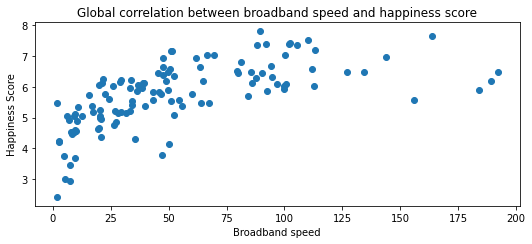

In [749]:
plt.scatter(dfibyCountry['Broadband Mbps'], dfhbyCountry['Happiness score'])
plt.title("Global correlation between broadband speed and happiness score")
plt.xlabel("Broadband speed")
plt.ylabel("Happiness Score")

### Build the regression model

In [750]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [751]:
model.fit(dfibyCountry['Broadband Mbps'].values.reshape(-1,1), dfhbyCountry['Happiness score'])

LinearRegression()

In [752]:
model.score(dfibyCountry['Broadband Mbps'].values.reshape(-1,1), dfhbyCountry['Happiness score'])
#r^2

0.3984562184884295

40% of variance explained by the model

In [753]:

model.intercept_

4.901567181223675

In [754]:
model.coef_

array([0.01535864])

## Plot the regression line

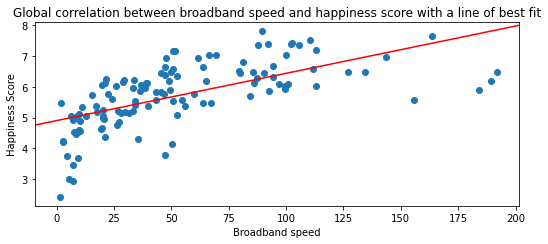

In [755]:
from statsmodels.graphics.regressionplots import abline_plot

plt.scatter(dfibyCountry['Broadband Mbps'], dfhbyCountry['Happiness score'])

b, m = model.intercept_, model.coef_[0]

plt.axline(xy1=(0,b), slope=m, color='r')
plt.title("Global correlation between broadband speed and happiness score with a line of best fit")
plt.xlabel("Broadband speed")
plt.ylabel("Happiness Score")
plt.show()

In [756]:
dfibyCountry.head()

,Country,Broadband Speed Rank,Broadband Mbps,Mobile Speed Rank,Mobile Mbps,As of
0,Afghanistan,179.0,1.62,138.0,5.10,January 2022
1,Albania,91.0,33.50,48.0,35.62,January 2022
2,Algeria,144.0,9.72,125.0,11.31,January 2022
3,Argentina,82.0,38.47,84.0,20.07,January 2022
4,Armenia,88.0,34.26,69.0,26.23,January 2022


In [757]:
dfhbyCountry.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,146,Afghanistan,2.404,2.469,2.339,1.263,0.758,0.000,0.289,0.000,0.089,0.005
1,90,Albania,5.199,5.321,5.076,1.718,1.439,0.646,0.719,0.511,0.138,0.028
2,96,Algeria,5.122,5.215,5.030,1.744,1.363,0.970,0.643,0.146,0.106,0.150
3,57,Argentina,5.967,6.090,5.844,1.891,1.592,1.102,0.662,0.555,0.081,0.085
4,82,Armenia,5.399,5.519,5.278,1.654,1.434,0.820,0.668,0.558,0.054,0.210


In [758]:
predictions = model.predict(np.array([1.62, 33.5, 9.72]).reshape(-1,1))

In [759]:
model.predict(np.array([91000, 0.056]).reshape(-1,1))

array([1402.53762655,    4.90242726])

nasa internet speed and the first internet speed yield the happiness scores
1402.53762655 and 4.90242726 respectively

graph prediction results

In [760]:
df_predictionresults = pd.DataFrame({'Country' : dfibyCountry['Country'].head(3),
                                     'Broadband Mbps (input)' : dfibyCountry['Broadband Mbps'].head(3),
                                    'Happiness Score' : dfhbyCountry['Happiness score'].head(3),
                                    
                                    'Predicted Happiness Score' :  predictions})
df_predictionresults

,Country,Broadband Mbps (input),Happiness Score,Predicted Happiness Score
0,Afghanistan,1.62,2.404,4.926448
1,Albania,33.50,5.199,5.416082
2,Algeria,9.72,5.122,5.050853


## broadband speed and mobile speed

In [761]:
np.cov(dfibyCountry['Broadband Mbps'],dfibyCountry['Mobile Mbps'])

array([[1837.9450381 ,  659.01254844],
       [ 659.01254844,  708.38819309]])

In [762]:
np.corrcoef(dfibyCountry['Broadband Mbps'],dfibyCountry['Mobile Mbps'])

array([[1.       , 0.5775529],
       [0.5775529, 1.       ]])

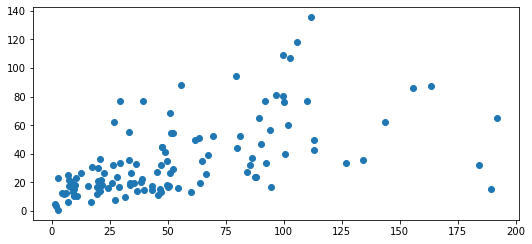

In [763]:
plt.scatter(dfibyCountry['Broadband Mbps'], dfibyCountry['Mobile Mbps']) 
plt.show()

In [764]:
speedModel.fit(dfibyCountry['Broadband Mbps'].values.reshape(-1,1), dfibyCountry['Mobile Mbps'])

LinearRegression()

In [765]:
speedModel.score(dfibyCountry['Broadband Mbps'].values.reshape(-1,1), dfibyCountry['Mobile Mbps'])

0.3335673495999719

In [766]:
speedModel.intercept_

15.946011095478

In [767]:
speedModel.coef_

array([0.35855944])

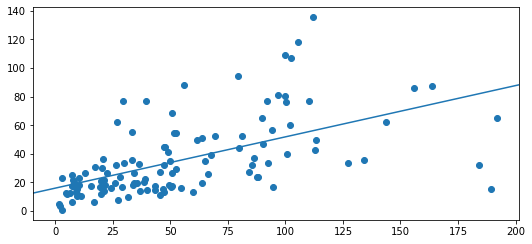

In [768]:
x1 = dfibyCountry['Broadband Mbps']
y1 = dfibyCountry['Mobile Mbps']

plt.scatter(x1,y1)
b,m = speedModel.intercept_, speedModel.coef_[0]
plt.axline(xy1=(0,b), slope=m)
plt.show()
